# Model Development
Estimated time needed: 30 minutes

#### Objectives
After completing this lab you will be able to:

**Develop prediction models**
In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.


Some questions we want to ask in this module:

1. Do I know if the dealer is offering fair value for my trade-in?
2. Do I know if I put a fair value on my car?

In data analytics, we often use Model Development to help us predict future observations from the data we have.

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
file_path =r"C:\Users\88017\Documents\mysql_dbs\new_jupyter\csv_files\automobileEDA.csv" 

df = pd.read_csv(file_path) 
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Linear Regression and Multiple Linear Regression

**Linear Regression**\
One example of a Data Model that we will be using is:

**Simple Linear Regression**\
Simple Linear Regression is a method to help us understand the relationship between two variables:

* The predictor/independent variable (X)
* The response/dependent variable (that we want to predict)(Y)

Here:       Y = Response Variable
            X = Predictor Variable
### Linear Function:

$$
 Y: Response \ Variable\\\\\\
 X: Predictor \ Variables
$$


$$
Yhat = a + b  X
$$

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.


**Linear Function**

* a refers to the intercept of the regression line, in other words: the value of Y when X is 0
* b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit
Let's load the modules for linear regression:¶

#### Let's load the modules for linear regression:

In [20]:
from sklearn.linear_model import LinearRegression

#### Create the linear regression object:¶

In [23]:
lm = LinearRegression()
lm

LinearRegression()

### How could "highway-mpg" help us predict car price?

For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [34]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg:

In [43]:
lm.fit(X,Y)

LinearRegression()

We can output a prediction:

In [48]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

#### What is the value of the intercept (a)?¶

In [51]:
lm.intercept_

38423.3058581574

#### What is the value of the slope (b)?¶

In [58]:
lm.coef_

array([-821.73337832])

### What is the final estimated linear model we get?
As we saw above, we should get a final linear model with the structure:


Plugging in the actual values we get:


$$
Yhat = a + b  X
$$

**Price** = 38423.31 - 821.73 x **highway-mpg**

## Practice Task: 

### Create a linear regression object called "lm1".

In [79]:
lm1 = LinearRegression()
lm1

LinearRegression()

### Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [94]:
x = df[['engine-size']]
y = df[['price']]

In [96]:
lm1.fit(x,y)

LinearRegression()

### Find the slope and intercept of the model.

In [99]:
lm1.coef_

array([[166.86001569]])

In [103]:
Yhat = lm1.predict(x) 
Yhat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [105]:
lm1.intercept_

array([-7963.33890628])

In [107]:
lm1.coef_

array([[166.86001569]])

In [111]:
Yhat2 = lm1.intercept_ + lm1.coef_ * x
Yhat2

,engine-size
0,13728.463134
1,13728.463134
2,17399.383479
3,10224.402804
4,14729.623228
...,...
196,15563.923306
197,15563.923306
198,20903.443808
199,16231.363369


In [113]:
price2 = lm1.intercept_ + lm1.coef_*df['engine-size']

ValueError: Length of values (1) does not match length of index (201)

## Multiple Linear Regression

What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$


$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

The equation is given by:


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


From the previous section we know that other good predictors of price could be:

* Horsepower
* Curb-weight
* Engine-size
* Highway-mpg

Let's develop a model using these variables as the predictor variables.

In [116]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27


In [118]:
lm3 = LinearRegression()

In [120]:
lm3.fit(Z, df['price'])

LinearRegression()

In [122]:
lm3.intercept_

-15806.624626329194

In [124]:
lm3.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

## Polynomial Regression

In [140]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    #plt.close()

In [134]:
x = df['highway-mpg']
y = df['price']

In [136]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


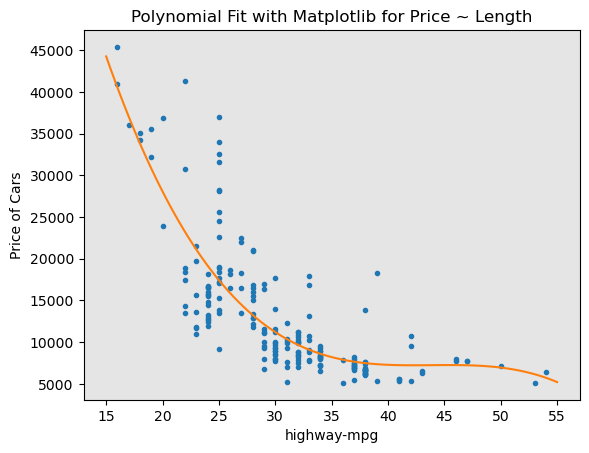

In [142]:
PlotPolly(p, x, y, 'highway-mpg')

In [144]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])